<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/04_logistic_regression_and_classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data = pd.read_csv("diabetes.csv")
data.head()


df = pd.DataFrame(data)

In [2]:
X = df[['BMI']]  # Variable independiente
y = df['Outcome']  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [3]:
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

print("Coeficiente (BMI):", coef)
print("Intercepto:", intercept)

Coeficiente (BMI): [0.09873118]
Intercepto: -3.86352571589852



**METRICAS DE EVALUACIÓN ERRORES**

In [5]:
import pandas as pd
import sklearn
import seaborn as sns

df_helados = pd.read_csv("IceCreamData.csv")
df_helados

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["Temperature"]]
y = df_helados["Revenue"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(375, 1)


In [7]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")

La pendiente del modelo (B) es: [21.44723414], el intersecto (A) es 46.01092732022141


Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

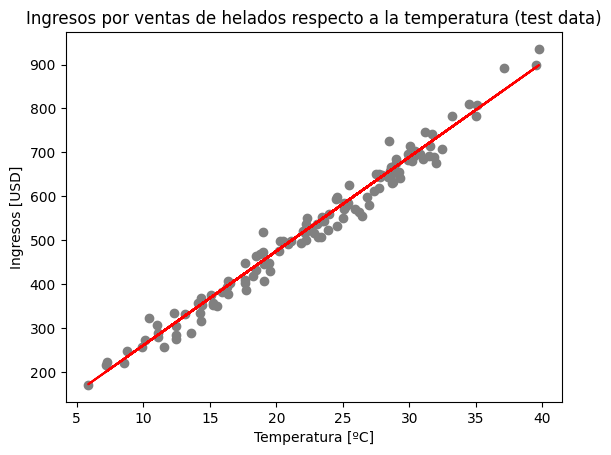

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')

In [9]:
#CALCULO DE LOS ERRORES

def errorAbsolutoMedioLibreria(y_real, y_pred):
  return (y_real - y_pred).abs().mean()

def errorAbsolutoMedioManual(y_real, y_pred):
  df = pd.DataFrame({'y_real': y_real, 'y_pred': y_pred})
  df['valorAbs'] = (df['y_real'] - df['y_pred']).abs()
  return df['valorAbs'].sum() / len(df)

print(errorAbsolutoMedioLibreria(y_test, regressor.predict(X_test)))
print(errorAbsolutoMedioManual(y_test, regressor.predict(X_test)))

19.142175242540514
19.142175242540514


In [10]:
from sklearn.metrics import mean_squared_error
import math

def erorCuadraticoMedioLibreria(y_real, y_predicho):
    mse = mean_squared_error(y_real, y_predicho)  # Calcula el MSE
    rmse = np.sqrt(mse)  # Aplica la raíz cuadrada al MSE
    return rmse

def erorCuadraticoMedioManual(y_real, y_pred):
  #print(y_real, y_pred)
  n = len(y_real)
  suma_error_cuadrado = 0
  for i in range(n):
        error = y_real[i] - y_pred[i]  # Diferencia entre valor real y predicho
        suma_error_cuadrado += error**2  # Suma de los errores al cuadrado

  mse = suma_error_cuadrado / n
  rmse = math.sqrt(mse)  # Raíz cuadrada del MSE para obtener el RMSE
  return rmse


y_test_np = np.array(y_test)  # Convierte a numpy si es necesario
y_predicho = regressor.predict(X_test)

print(erorCuadraticoMedioLibreria(y_test_np, y_predicho))
print(erorCuadraticoMedioManual(y_test_np, y_predicho))

24.440463592461477
24.440463592461484


In [11]:
from sklearn.metrics import r2_score

def R2Libreria(y_real, y_pred):
  return r2_score(y_real, y_pred)

def R2Manual(y_real, y_pred):
  y_media = sum(y_real) / len(y_real)
  ss_res = sum((y_real[i] - y_pred[i])**2 for i in range(len(y_real)))
  ss_tot = sum((y_real[i] - y_media)**2 for i in range(len(y_real)))

  r2 = 1 - (ss_res / ss_tot)
  return r2


y_test_np = np.array(y_test)
y_predicho_np = np.array(regressor.predict(X_test))

print(f"R² (librería): {R2Libreria(y_test_np, y_predicho_np)}")
print(f"R² (manual): {R2Manual(y_test_np, y_predicho_np)}")

R² (librería): 0.9772803760535365
R² (manual): 0.9772803760535365


# **Ejercicio de Métricas: Covarianza**

* Accuracy (Exactitud)
* Precisión
* Recall (Sensibilidad)
* F1
* Support

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [13]:
# Valores reales y predicciones
y_true = [1, 1, 0, 1, 0, 1, 0, 0, 1, 0]  # Clases reales
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]  # Clases predichas

cm = confusion_matrix(y_true, y_pred)

TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [14]:
# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)


In [15]:
# Mostrar resultados
print("Matriz de Confusión:\n", cm)
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {recall:.2f}")
print(f"Exactitud: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

Matriz de Confusión:
 [[4 1]
 [1 4]]
Precisión: 0.80
Sensibilidad: 0.80
Exactitud: 0.80
F1-Score: 0.80


In [16]:
# Valores reales y predicciones
y_true = [1, 1, 0, 1, 0, 1, 0, 0, 1, 0]  # Clases reales
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]  # Clases predichas

In [17]:
cm = confusion_matrix(y_true, y_pred)

cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [18]:
# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Mostrar resultados
print("Matriz de Confusión:\n", cm)
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad: {recall:.2f}")
print(f"Exactitud: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

Matriz de Confusión:
 [[4 1]
 [1 4]]
Precisión: 0.80
Sensibilidad: 0.80
Exactitud: 0.80
F1-Score: 0.80
